In [20]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import os 
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
class split_filename:
    
    def __init__(self, filename):
        
        self.filename = filename
        
        if self.filename[:3] == 'GIS':
            args = self.filename.split('_')
            self._name = args[0]
            self._year = int(args[5])
            self._doy = int(args[6])
            self._hour = int(args[7].replace('.nc', ''))
        else:
            args = self.filename.split('.')
            self._leo = args[0]
            self._year = int(args[1])
            self._doy = int(args[2])
            self._hour = int(args[3])
            self._minute = int(args[4])


            
        self._date = datetime.date(self._year, 1, 1) + datetime.timedelta(self._doy - 1)
        
    
    @property
    def year(self):
        return self._year
    @property
    def doy(self):
        return self._doy
    @property
    def hour(self):
        return self._hour
    @property
    def minute(self):
        return self._minute
    @property
    def date(self):
        return self._date

In [22]:
split_filename(filename).year

2020

C:\Users\Jussiara Rodrigues\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Jussiara Rodrigues\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
C:\Users\Jussiara Rodrigues\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not position

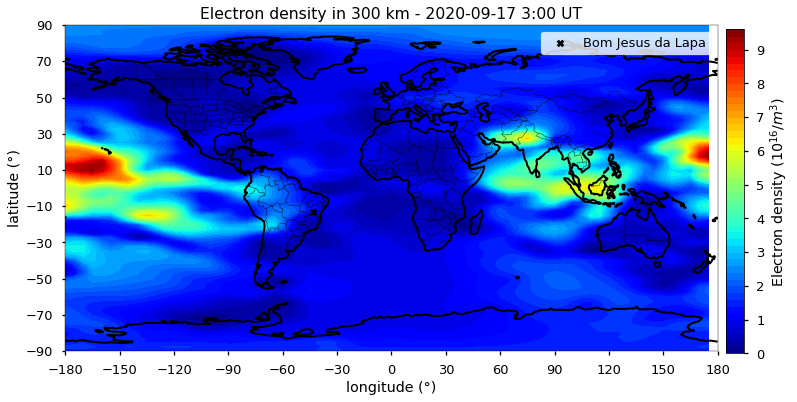

In [36]:
infile = 'C:\\Users\\Jussiara Rodrigues\\Google Drive\\2020.261\\'
filename = "GIS_Ne_IRI_RO_GPS_2020_261_03.nc"

ds = xr.open_dataset(infile + filename)
ds.coords['nlon'] = np.arange(-180, 180, 5)
ds.coords['nlat'] = np.arange(-90, 90 + 2.5, 2.5)
ds.coords['nalt'] = np.arange(0, 1000 + 20, 20)

arg = split_filename(filename)

ds.coords['time'] = dt.datetime(arg.year, 1, 1, arg.hour) + dt.timedelta(days = arg.doy - 1)


alts = [280, 300, 320]

t = ds['Ne'].sel(nalt = 300)

fig, ax = plt.subplots( figsize = (12, 6), sharey = True, sharex = True,
                       subplot_kw =dict(projection=ccrs.PlateCarree(), facecolor="gray"))
plt.style.use('seaborn-talk')

lon = np.arange(-180, 180, 5)
lat = np.arange(-90, 90 + 2.5, 2.5) 
img = ax.contourf(lon, lat, t.values, 60, cmap = 'jet')

cbar_ax = fig.add_axes([.9, 0.12, 0.02, 0.75]) 

fig.colorbar(img, cax=cbar_ax, label = 'Electron density ($10^{16}/m^3$)')

ax.set_global()
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none')

ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw = 2) 
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.set(xticks = np.arange(-180, 210, 30), xlabel = 'longitude (°)', ylabel = 'latitude (°)',
       yticks = np.arange(-90, 110, 20), title = f'Electron density in 300 km - {str(arg.date)} {arg.hour}:00 UT')


ax.scatter(-43.25, -13.11, s = 50, marker = 'X', color = 'k', 
           transform = ccrs.PlateCarree(), label = 'Bom Jesus da Lapa')

ax.legend()

plt.show()

In [37]:
FigureName = filename.replace('.nc', '.png')
fig.savefig("Figures/" + FigureName,  dpi = 100, quality = 95, bbox_inches="tight")

C:\Users\Jussiara Rodrigues\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  
